In [1]:
##############################################
import sys,os
import numpy as np
import pylab as py
##############################################
import pylab as py
from  matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format = 'retina' 
##############################################
PATH='../python/'  # path of the JAMLIB python folder
sys.path.append(PATH)  
from corelib import JAMLIB
##############################################
import lhapdf
##############################################

## Plotting range

In [2]:
z = np.linspace(0.05,1,100)

## Using JAMLIB interface

In [3]:
JAMffpi=JAMLIB(PATH+'JAM16/FFpion')
JAMffk=JAMLIB(PATH+'JAM16/FFkaon')

########################################################## 
                                                           
     _   _    __  __ _     ___ ____                        
    | | / \  |  \/  | |   |_ _| __ )                       
 _  | |/ _ \ | |\/| | |    | ||  _ \                       
| |_| / ___ \| |  | | |___ | || |_) |                      
 \___/_/   \_\_|  |_|_____|___|____/                       
                                                           
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
                                                           
Authors:                                                   
Nobuo Sato         (Jefferson Lab)                         
Jake Ethier        (College of William and Mary)           
Wally Melnitchouk  (Jefferson Lab)                         
Alberto Accardi    (Hampton University and Jefferson Lab)  
########################################################## 
loading JAM16/FFpion tables [100%]
#####

In [4]:
#zD(z) for kaons and pions using JAM

post = 10
Q2 = 10500. #1.17210230e+02

zpi_JAM = []
zk_JAM = []
for f in ['g','up','dp','sp','cp','bp']:
  zpi_JAM.append([JAMffpi.get_XF(post,f,z[i],Q2) for i in range(len(z))])
  zk_JAM.append([JAMffk.get_XF(post,f,z[i],Q2) for i in range(len(z))])

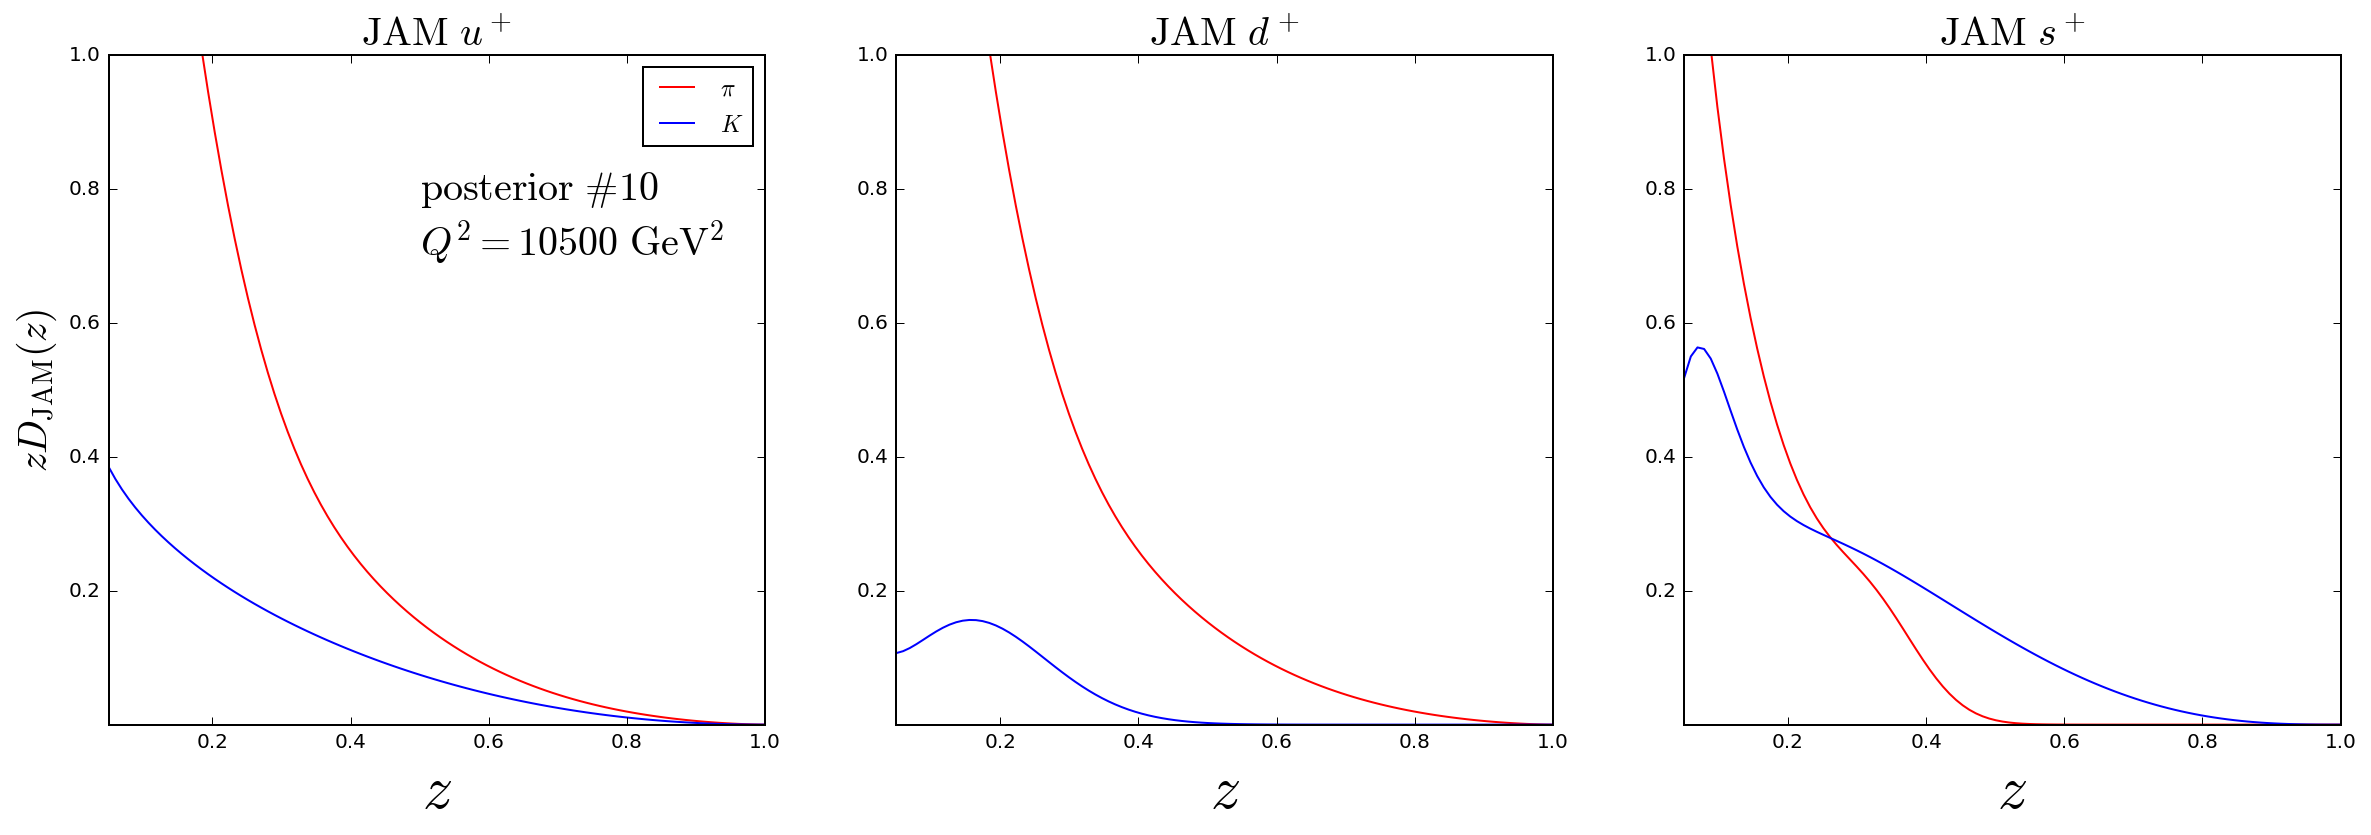

In [5]:
#Plot using JAM

fig = plt.figure(figsize=(20,6))

plotlims = [0.05,1,1e-8,1.0]
plotscale = 'linear'

plt.subplot(1,3,1)
plt.plot(z,zpi_JAM[1],'r-',label='$\pi$')
plt.plot(z,zk_JAM[1],'b-',label='$K$')
plt.axis(plotlims)
plt.yscale(plotscale)
plt.title(r'${\rm JAM\ } u^+$',size=20)
plt.xlabel('$z$', fontsize=30) #Label x axis
plt.ylabel('$zD_{\\rm JAM}(z)$',fontsize=20) # Label y axis
if plotscale=='linear':
  xQ,yQ = 0.5,0.7
  yQp = 1.12*yQ
elif plotscale=='log':
  xQ,yQ = 0.1,5e-8
  yQp = np.exp(0.9*np.log(yQ))
plt.text(xQ,yQp,r'${\rm posterior\ \#%d}$'%post,fontsize=20)
plt.text(xQ,yQ,r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=20)
plt.legend()


plt.subplot(1,3,2)
plt.plot(z,zpi_JAM[2],'r-',label='$\pi$')
plt.plot(z,zk_JAM[2],'b-',label='$K$')
plt.axis(plotlims)
plt.yscale(plotscale)
plt.title(r'${\rm JAM\ } d^+$',size=20)
plt.xlabel('$z$', fontsize=30) #Label x axis
#plt.legend()


plt.subplot(1,3,3)
plt.plot(z,zpi_JAM[3],'r-',label='$\pi$')
plt.plot(z,zk_JAM[3],'b-',label='$K$')
plt.axis(plotlims)
plt.yscale(plotscale)
plt.title(r'${\rm JAM\ } s^+$',size=20)
plt.xlabel('$z$', fontsize=30) #Label x axis
#plt.legend()

#plt.savefig('fig.JAM.%0.0f.png'%Q2)
plt.show()

## Using LHAPDF interface

In [6]:
member = post+1
# (Uses same Q2 as JAM)

lhapdfffpi = lhapdf.mkPDF("JAM16FF_pi_Ceven",member)
lhapdfffk = lhapdf.mkPDF("JAM16FF_K_Ceven",member)

zpi_lha = []
zk_lha = []
for f in [21,2,1,3,4,5]:
  zpi_lha.append([lhapdfffpi.xfxQ2(f,z[i],Q2) for i in range(len(z))])
  zk_lha.append([lhapdfffk.xfxQ2(f,z[i],Q2) for i in range(len(z))])

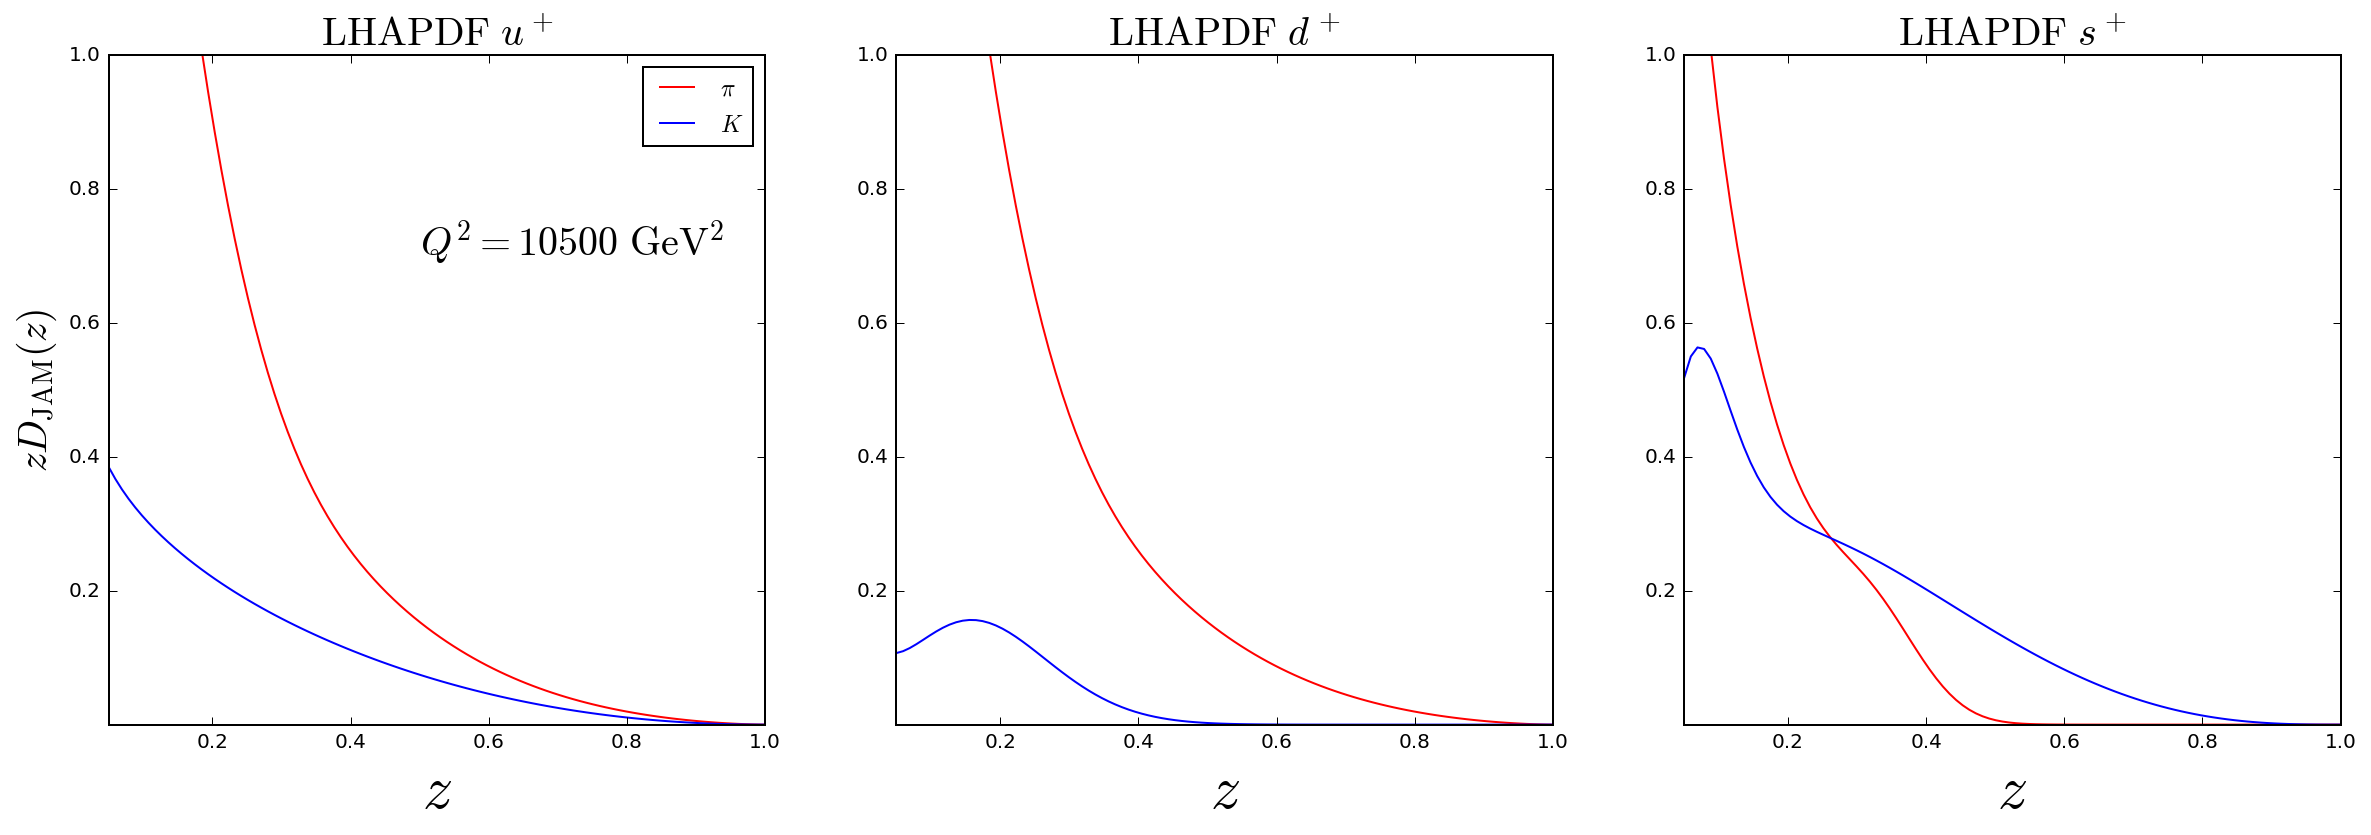

In [7]:
#Plot using lhapdf
fig = plt.figure(figsize=(20,6))

plotlims = [0.05,1,1e-8,1.0]
plotscale = 'linear'

plt.subplot(1,3,1) # up
plt.plot(z,zpi_lha[1],'r-',label='$\pi$') 
plt.plot(z,zk_lha[1],'b-',label='$K$')
plt.axis(plotlims)
plt.yscale(plotscale)
plt.title(r'${\rm LHAPDF\ } u^+$',size=20)
plt.xlabel('$z$', fontsize=30) #Label x axis
plt.ylabel('$zD_{\\rm JAM}(z)$',fontsize=20) # Label y axis
if plotscale=='linear':
  xQ,yQ = 0.5,0.7
  yQp = 1.12*yQ
elif plotscale=='log':
  xQ,yQ = 0.1,5e-8
  yQp = np.exp(0.9*np.log(yQ))
if member==0:
  plt.text(xQ,yQp,r'${\rm posterior\ \#%d}$'%post,fontsize=20)
  
plt.text(xQ,yQ,r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=20)
plt.legend()


plt.subplot(1,3,2)
plt.plot(z,zpi_lha[2],'r-',label='$\pi$')
plt.plot(z,zk_lha[2],'b-',label='$K$')
plt.axis(plotlims)
plt.yscale(plotscale)
plt.title(r'${\rm LHAPDF\ } d^+$',size=20)
plt.xlabel('$z$', fontsize=30) #Label x axis
#plt.legend()

plt.subplot(1,3,3)
plt.plot(z,zpi_lha[3],'r-',label='$\pi$')
plt.plot(z,zk_lha[3],'b-',label='$K$')
plt.axis(plotlims)
plt.yscale(plotscale)
plt.title(r'${\rm LHAPDF\ } s^+$',size=20)
plt.xlabel('$z$', fontsize=30) #Label x axis
#plt.legend()

plt.show()

## Ratios of LHAPDF / JAM interpolators

In [8]:
#Ratios JAM/lhapdf for u,d,s

rpi = []
rk = []
for f in [0,1,2,3,4,5]:
  rpi.append([zpi_JAM[f][i]/zpi_lha[f][i] for i in range(len(z))])
  rk.append([zk_JAM[f][i]/zk_lha[f][i] for i in range(len(z))])

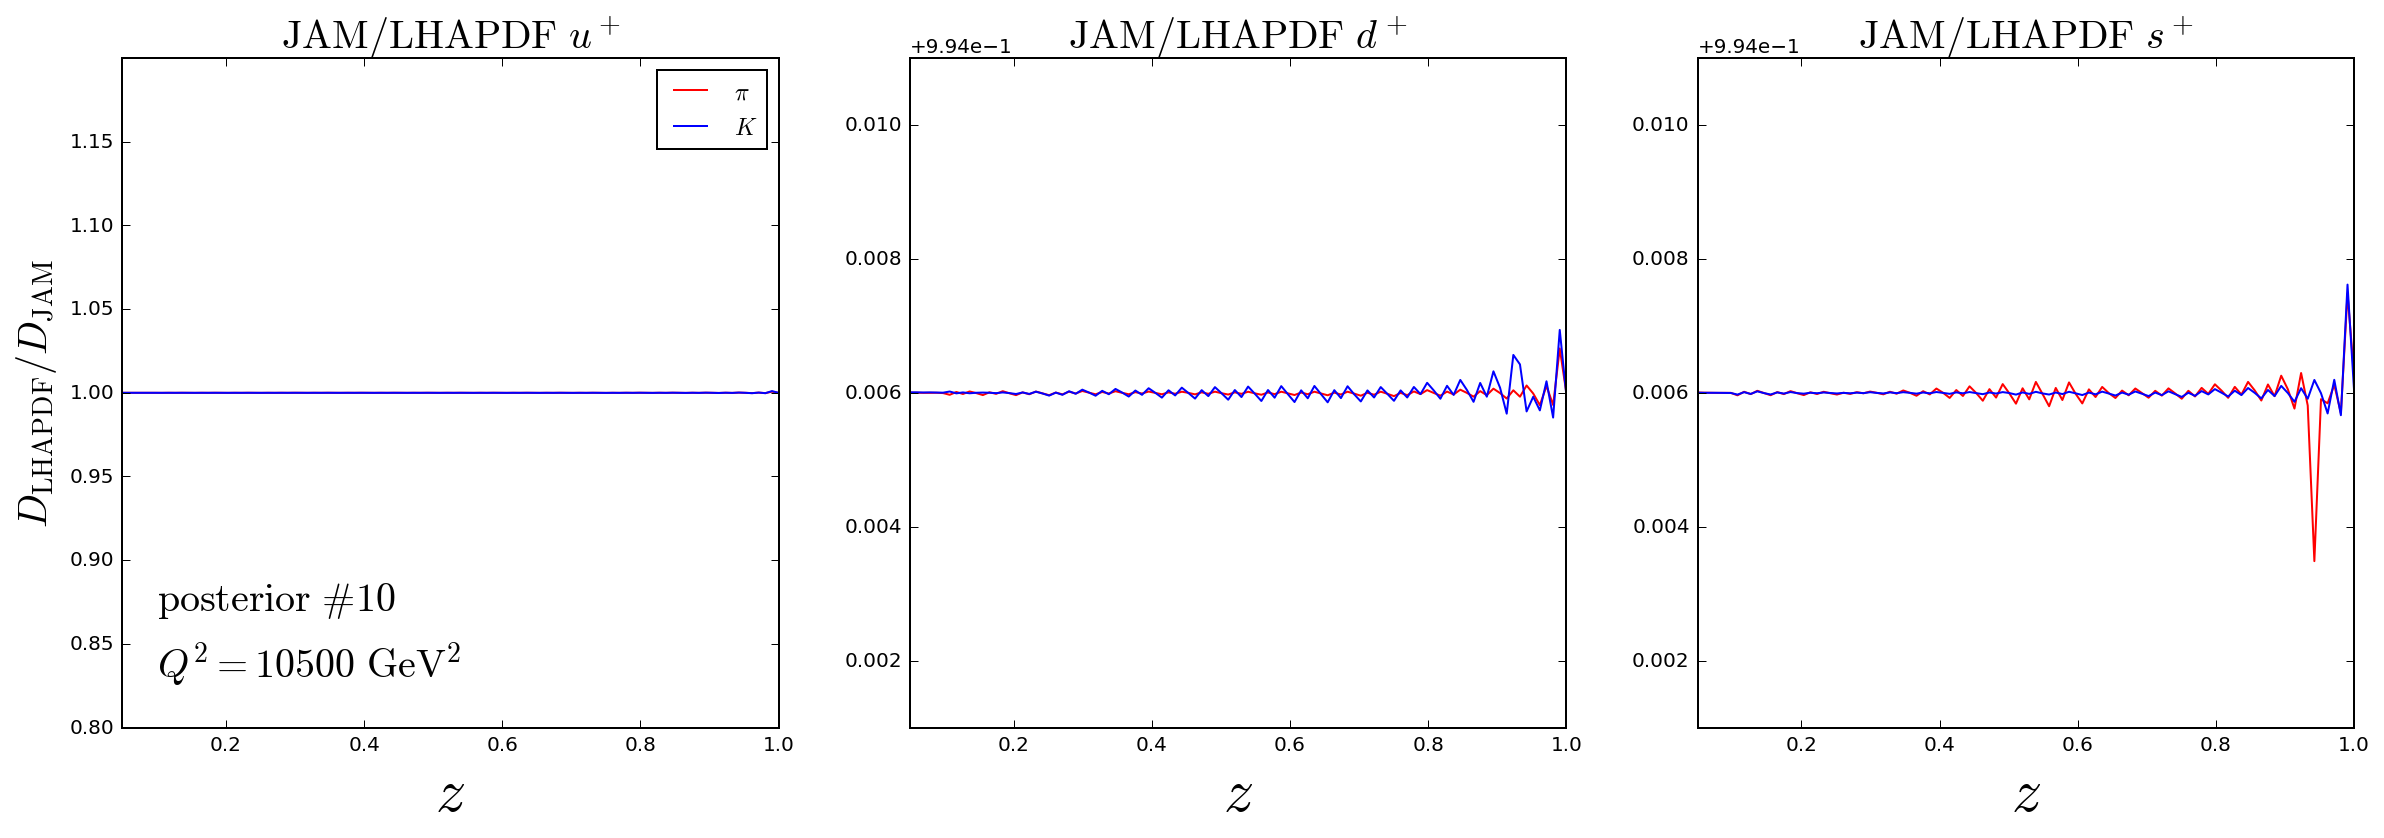

In [9]:
fig = plt.figure(figsize=(20,6))

plotlims=[0.05,1,0.995,1.005]

plt.title('JAM/LHAPDF')
plt.subplot(1,3,1)
plt.plot(z,rpi[1],'r-',label='$\pi$')
plt.plot(z,rk[1],'b-',label='$K$')
plt.xlim([0.05,1])
plt.axis([0.05,1,0.8,1.2])
plt.title(r'${\rm JAM/LHAPDF\ } u^+$',size=20)
plt.xlabel('$z$', fontsize=30) #Label x axis
plt.ylabel('$D_{\\rm LHAPDF}/D_{\\rm JAM}$',fontsize=20) # Label y axis
plt.text(0.1,0.87,r'${\rm posterior\ \#%d}$'%post,fontsize=20)
plt.text(0.1,0.83,r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=20)
plt.legend()


plt.subplot(1,3,2)
plt.plot(z,rpi[2],'r-',label='$\pi$')
plt.plot(z,rk[2],'b-',label='$K$')
#plt.xlim([0.05,1])
plt.axis(plotlims)
#plt.axis([0.05,1,1-2e-4,1+2e-4])
plt.title(r'${\rm JAM/LHAPDF\ } d^+$',size=20)
plt.xlabel('$z$', fontsize=30) #Label x axis
%plt.legend()

plt.subplot(1,3,3)
plt.plot(z,rpi[3],'r-',label='$\pi$')
plt.plot(z,rk[3],'b-',label='$K$')
plt.xlabel('$z$', fontsize=20) #Label x axis
plt.axis(plotlims)
#plt.axis([0.05,1,1-2e-4,1+2e-4])
#plt.xlim([0.05,1])
plt.title(r'${\rm JAM/LHAPDF\ } s^+$',size=20)
plt.xlabel('$z$', fontsize=30) #Label x axis
#plt.legend()

#plt.savefig('fig.LHA_JAM.%0.0f.png'%Q2)
plt.show()